# Benchmarking pour un dossier de prédictions


@Author Colin de Seroux


## <span style="color:lightblue">Installation des dépendances</span>


In [31]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## <span style="color:lightblue">Importation des dépendances</span>


In [32]:
import pandas as pd
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

from utils import extract_annotations_from_file, extract_predictions_from_folder, extract_metrics, get_coco_predictions, evaluate_metrics, extract_inference_time, plot_inference_time, plot_inference_time_mAP_50_95

## <span style="color:lightblue">Code principale</span>


### <span style="color:lightgreen">Environnement</span>


In [33]:
ANNOTATIONS_FILE_PATH = "../../fastRcnn/data/test/result.json"
PREDICTIONS_DIR = "../faster-rcnn/predictions"
DATASET_NAME = "DATASET 4"
COMPARED_TYPE = f"{DATASET_NAME} FASTER RCNN"
INFERENCE_TIME_GOAL = 200

### <span style="color:lightgreen">Récupération des données</span>


In [34]:
y_true, class_names = extract_annotations_from_file(ANNOTATIONS_FILE_PATH)
y_preds, y_scores = extract_predictions_from_folder(ANNOTATIONS_FILE_PATH, PREDICTIONS_DIR)
coco_annotations = COCO(ANNOTATIONS_FILE_PATH)
coco_predictions = get_coco_predictions(coco_annotations, PREDICTIONS_DIR)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!


### <span style="color:lightgreen">mAP</span>


Initialiser l'évaluation


In [35]:
coco_evals = []

for coco_prediction in coco_predictions:
    coco_eval = COCOeval(coco_annotations, coco_prediction, iouType="bbox")
    coco_evals.append(coco_eval)

Calculer les AP et AR


In [36]:
for coco_eval in coco_evals:
	coco_eval.evaluate()
	coco_eval.accumulate()
	coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.158
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.182
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.306
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

### <span style="color:lightgreen">Récupération des metrics</span>


In [37]:
metrics = []

for coco_eval in coco_evals:
    precision, recall, scores, iou_lookup = evaluate_metrics(coco_eval)
    current_metrics = extract_metrics(precision, recall)
    metrics.append(current_metrics)

### <span style="color:lightgreen">Traitement des données</span>


In [38]:
prediction_files, inference_times, average_inference_time = extract_inference_time(PREDICTIONS_DIR)

### <span style="color:lightgreen">Comparaison uniquement sur le temps</span>


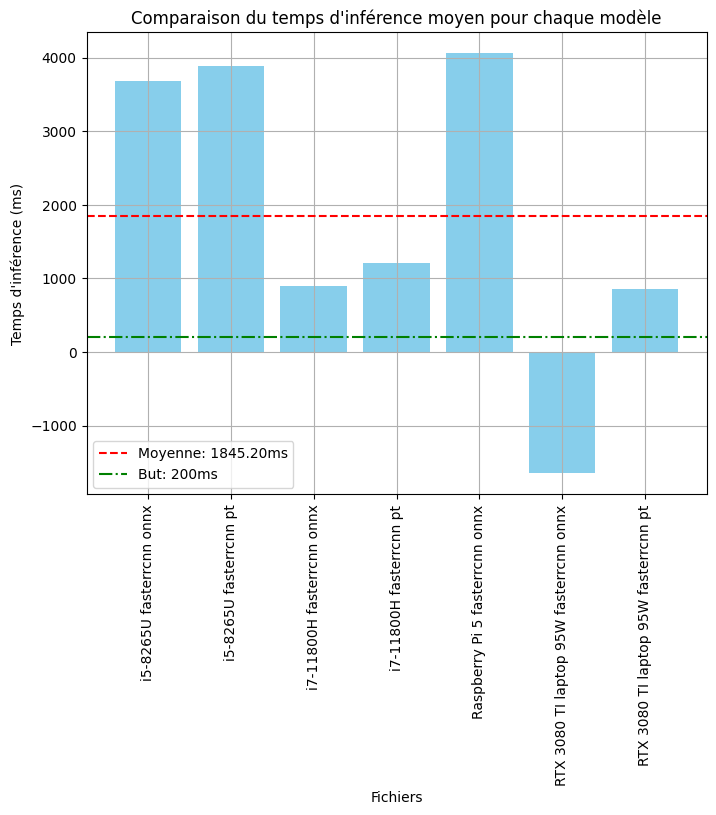

In [39]:
plot_inference_time(prediction_files, inference_times, average_inference_time, INFERENCE_TIME_GOAL, COMPARED_TYPE)

### <span style="color:lightgreen">Nuage de points pour une comparaison simplifiée</span>


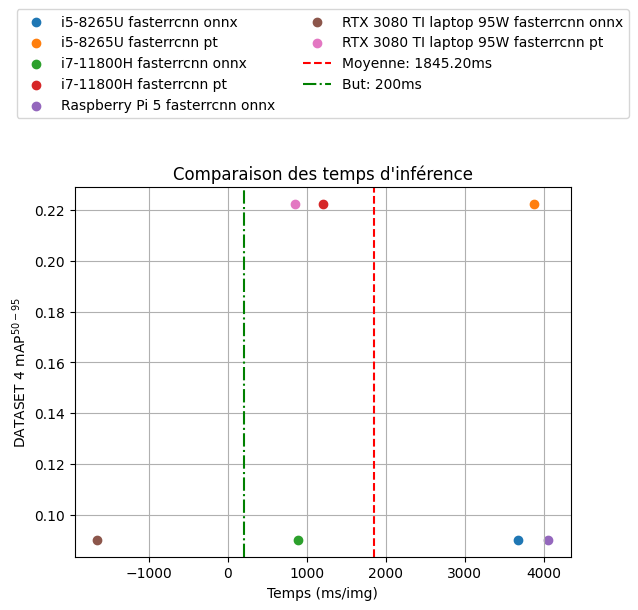

In [40]:
plot_inference_time_mAP_50_95(prediction_files, inference_times, average_inference_time, metrics, INFERENCE_TIME_GOAL, DATASET_NAME, COMPARED_TYPE)

### <span style="color:lightgreen">Comparaison sous forme de tableau avec le F1-score</span>


In [41]:
data = []

for metric, inference_time, prediction_file in zip(metrics, inference_times, prediction_files):
    data.append({
        "Nom du modèle": prediction_file,
        "mAP 50-95": metric["mAP_50_95"],
        "F1-score": metric["f1_score_50_95"],
        "Temps d'inférence moyen": inference_time
    })

df_metrics = pd.DataFrame(data)

df_metrics.style.format({
    "mAP 50-95": "{:.3}".format,
    "F1-score": "{:.3}".format,
    "Temps d'inférence moyen": "{:.4}ms".format
})

df_metrics.to_csv(f"../results/benchmarking/{COMPARED_TYPE}_metrics.csv", index=False)

df_metrics

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

## <span style="color:lightblue">Sources</span>


- https://gist.github.com/shivamsnaik/c5c5e99c00819d2167317b1e56871187
- https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.f1_score.html
- https://kobia.fr/classification-metrics-f1-score
